In [1]:
import os
import glob
import pandas as pd

import tools
from transformator import (
    relative_concentration, get_accepted_maximum_value,
    get_all_relative_concentration)
import warnings
warnings.simplefilter("ignore", UserWarning)

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = tools.get_all_data('row_data', 'txt')

data_pd = data[data['status'] == 'PD']
data_led = data[data['status'] == 'LED']

In [3]:
data.head()

,H2,CO,C2H4,C2H2,status,datetime
0,0.000224,0.000862,0.000000,0.000000,LTO,2020-01-01 00:00:00
1,0.000900,0.000848,0.000900,0.000022,LTO,2020-01-01 12:00:00
2,0.000000,0.000902,0.000045,0.000000,LTO,2020-01-02 00:00:00
3,0.000470,0.001153,0.000448,0.000000,LTO,2020-01-02 12:00:00
4,0.000065,0.000996,0.000005,0.000000,LTO,2020-01-03 00:00:00


# Дефект Низкотемпературного перегрева

In [4]:
data_lto = data[data['status'] == 'LTO']
data_normal = data[data['status'] == 'norm']
data_lto.head()

,H2,CO,C2H4,C2H2,status,datetime
0,0.000224,0.000862,0.000000,0.000000,LTO,2020-01-01 00:00:00
1,0.000900,0.000848,0.000900,0.000022,LTO,2020-01-01 12:00:00
2,0.000000,0.000902,0.000045,0.000000,LTO,2020-01-02 00:00:00
3,0.000470,0.001153,0.000448,0.000000,LTO,2020-01-02 12:00:00
4,0.000065,0.000996,0.000005,0.000000,LTO,2020-01-03 00:00:00


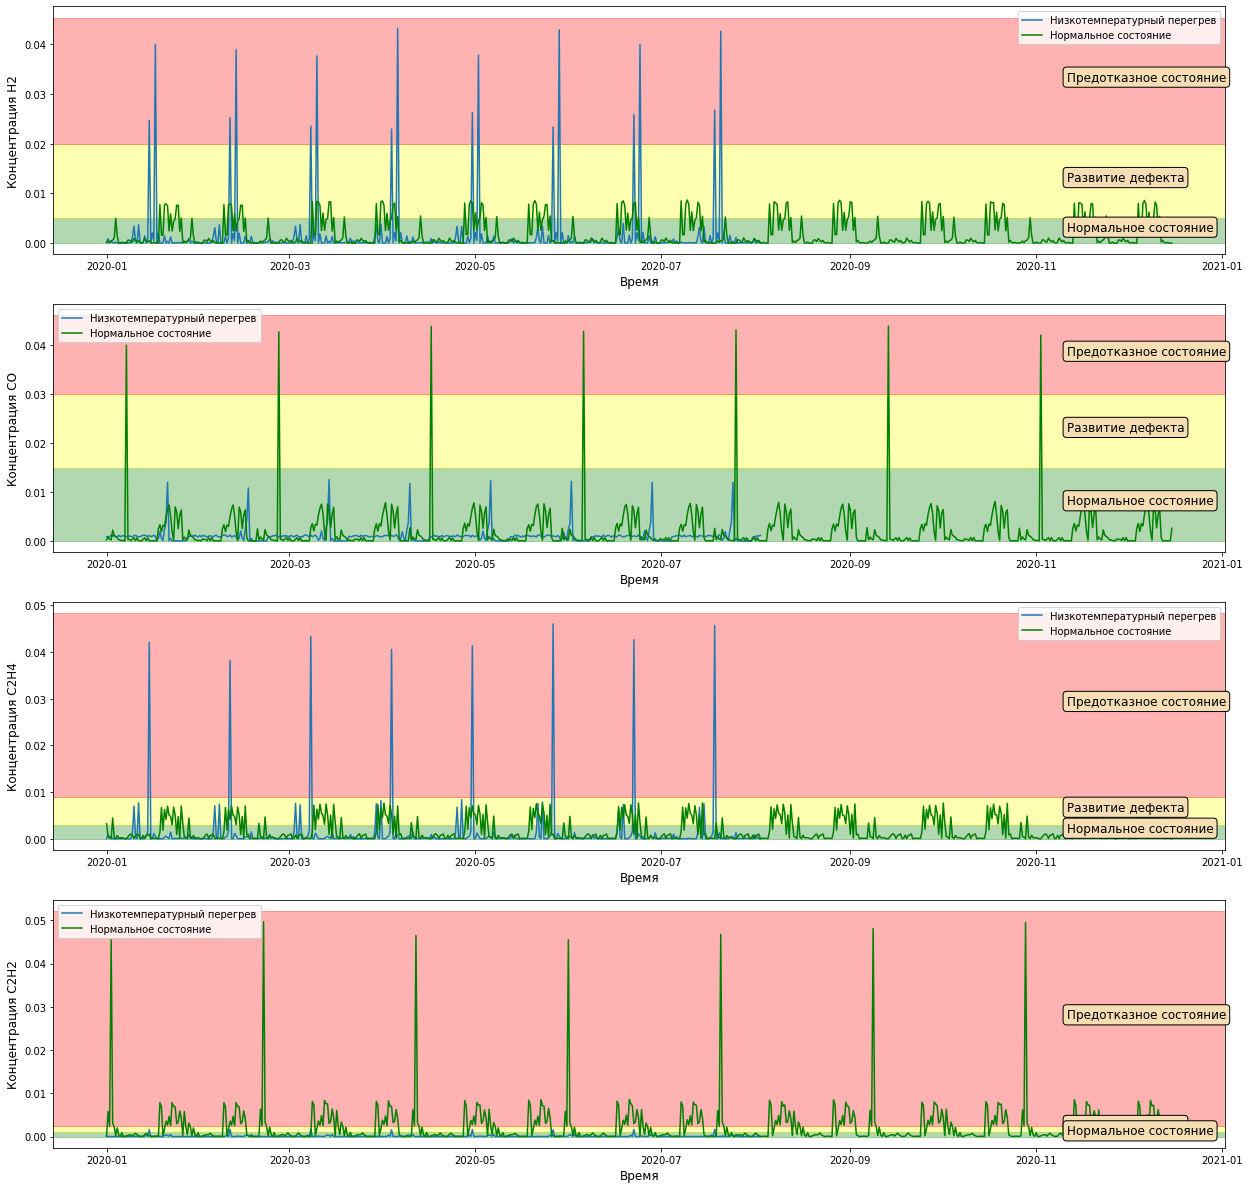

In [5]:
fig, ax = plt.subplots(4, 1, figsize=(21, 21))
props = dict(boxstyle='round', facecolor='wheat', alpha=1)

for i, gas in zip(range(0, 4), ['H2', 'CO', 'C2H4', 'C2H2']):
    
    accepted_level = get_accepted_maximum_value(gas, 0, '35kW')[0]
    maximum_level = get_accepted_maximum_value(gas, 0, '35kW')[1]
    
    max_axhspan_level = max(data_lto[gas].max(), data_normal[gas].max()) * 1.05 
    
    max_text_level = (max_axhspan_level - maximum_level) / 2 + maximum_level
    accepted_text_level = (maximum_level - accepted_level) / 2 + accepted_level
    normal_text_level = accepted_level / 2
    text_egle = round(len(data_normal['datetime']) * 0.90) 
    # Графики
    ax[i].plot(data_lto['datetime'], data_lto[gas], label='Низкотемпературный перегрев')
    ax[i].plot(data_normal['datetime'], data_normal[gas], label='Нормальное состояние', color='green') 
    # Зоны
    ax[i].axhspan(0, accepted_level, facecolor='1', color='green', alpha=0.3)
    ax[i].axhspan(accepted_level, maximum_level, facecolor='1', color='yellow', alpha=0.3)
    ax[i].axhspan(maximum_level, max_axhspan_level, facecolor='1', color='red', alpha=0.3)
    # Текст
    ax[i].text(data_normal['datetime'].iloc[text_egle], max_text_level, "Предотказное состояние", fontsize=12, color='black',
              bbox=props)
    ax[i].text(data_normal['datetime'].iloc[text_egle], accepted_text_level, "Развитие дефекта", fontsize=12, color='black',
              bbox=props)
    ax[i].text(data_normal['datetime'].iloc[text_egle], normal_text_level, "Нормальное состояние", fontsize=12, color='black',
              bbox=props)
    ax[i].set_xlabel("Время", fontsize=12)
    ax[i].set_ylabel(f'Концентрация {gas}', fontsize=12)
    ax[i].legend()

plt.show()

In [6]:
df_relative_conc = get_all_relative_concentration(data_lto[['H2', 'CO', 'C2H4', 'C2H2']])
df_relative_conc.head()

,H2,CO,C2H4,C2H2
0,0.0448,0.057457,0.000000,0.000
1,0.1800,0.056563,0.300000,0.022
2,0.0000,0.060102,0.015000,0.000
3,0.0940,0.076867,0.149333,0.000
4,0.0130,0.066426,0.001667,0.000
